# Import

In [16]:
#####################################################
# referenced codes: 
######################################################

%load_ext autoreload
%autoreload 2
%matplotlib inline


import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm as tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from stl10_input import DATA_PATH_TRAIN, LABEL_PATH_TRAIN, DATA_PATH_TEST, LABEL_PATH_TEST

from preprocess import RELEVANT_CLASSES, IMAGE_SHAPE, N_CLASSES, classes, preprocess, import_images
from store import load, save

from sift import sift_keypoints, get_patch_centers, sift_dense, sift_plot

from kmeans import select_subsets, kmeans_model, calc_class_features, predict_class_features, plot_class_features

import collections
import json
from plot import plot_confusion_matrix, plot_pred_distribution, plot_and_save_dots, plot_top_images
from mAP import calculate_mAP

# Preprocess

In [18]:
n_train, n_test = 50, 100
images_train_ordered, labels_train_ordered, images_test, labels_test = preprocess(n_train, n_test)

# mAP and plots

In [23]:
def load_predictions(percentage1, vocab_size):
    percentage2 = 100 - percentage1
    
    preds_train_all_filename = f'preds_train_all_{vocab_size}'
    preds_test_all_filename = f'preds_test_all_{vocab_size}'

    preds_train_all = load(preds_train_all_filename, percentage1, percentage2)
    preds_test_all  = load(preds_test_all_filename, percentage1, percentage2)
    
    return preds_train_all, preds_test_all

def do_calculate_mAP(percentage1, vocab_size):
    preds_train_all, preds_test_all = load_predictions(percentage1, vocab_size)
    
    preds_train_ranked, preds_train_ranked_binary, preds_train_indices, labels_train_ranked, labels_train_ranked_binary = preds_train_all
    preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all

    mAP_train = calculate_mAP(preds_train_ranked_binary, labels_train_ranked_binary)
    mAP_test  = calculate_mAP(preds_test_ranked_binary, labels_test_ranked_binary)

    return mAP_train, mAP_test
    

percentages = [30, 40, 50, 60]
    
vocab_sizes = [500, 1000, 1500, 2000]
# vocab_sizes = [vocab_sizes[:2]]

def makehash():
    return collections.defaultdict(makehash)
mAP_dict = makehash()

for percentage1 in percentages:
        for vocab_size in vocab_sizes:
            try:
                mAP_train, mAP_test = do_calculate_mAP(percentage1, vocab_size)
                mAP_dict['train']['sift'][percentage1][vocab_size] = mAP_train
                mAP_dict['test']['sift'][percentage1][vocab_size] = mAP_test
            except:
                print(f'percentage1 = {percentage1}, vocab_size = {vocab_size}\tnot found!')
            
print(json.dumps(mAP_dict, indent=2))

percentage1 = 40, vocab_size = 2000	not found!
percentage1 = 50, vocab_size = 500	not found!
percentage1 = 50, vocab_size = 1500	not found!
percentage1 = 50, vocab_size = 2000	not found!
percentage1 = 60, vocab_size = 500	not found!
percentage1 = 60, vocab_size = 1500	not found!
percentage1 = 60, vocab_size = 2000	not found!
{
  "train": {
    "sift": {
      "30": {
        "500": 0.6596531708336207,
        "1000": 0.6883216641053735,
        "1500": 0.6969610209769247,
        "2000": 0.716
      },
      "40": {
        "500": 0.6324153575192798,
        "1000": 0.6453333333333333,
        "1500": 0.6906480174657599
      },
      "50": {
        "1000": 0.5359999999999999
      },
      "60": {
        "1000": 0.4
      }
    }
  },
  "test": {
    "sift": {
      "30": {
        "500": 0.15290523878779044,
        "1000": 0.12281118987540077,
        "1500": 0.08928189611195647,
        "2000": 0.08843923463649875
      },
      "40": {
        "500": 0.13085454036194827,
       

##################################### 30% ######################################

#################################### TRAIN #####################################


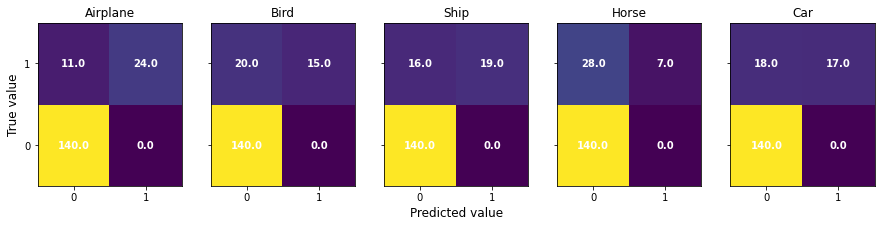

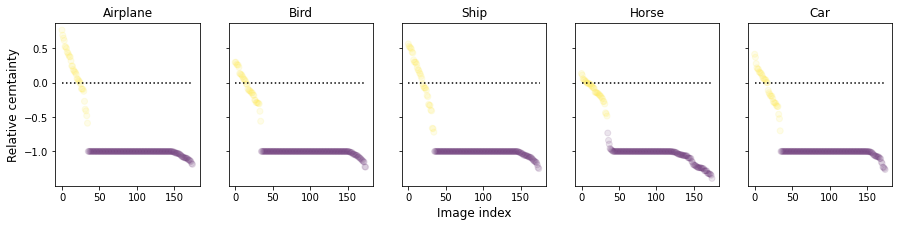

##################################### TEST #####################################


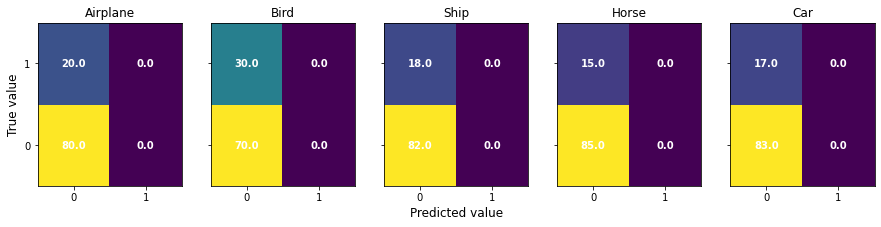

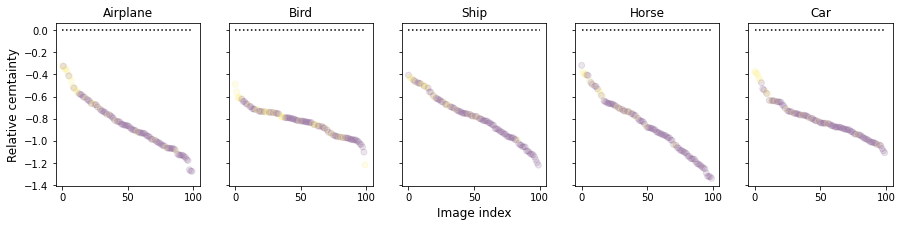

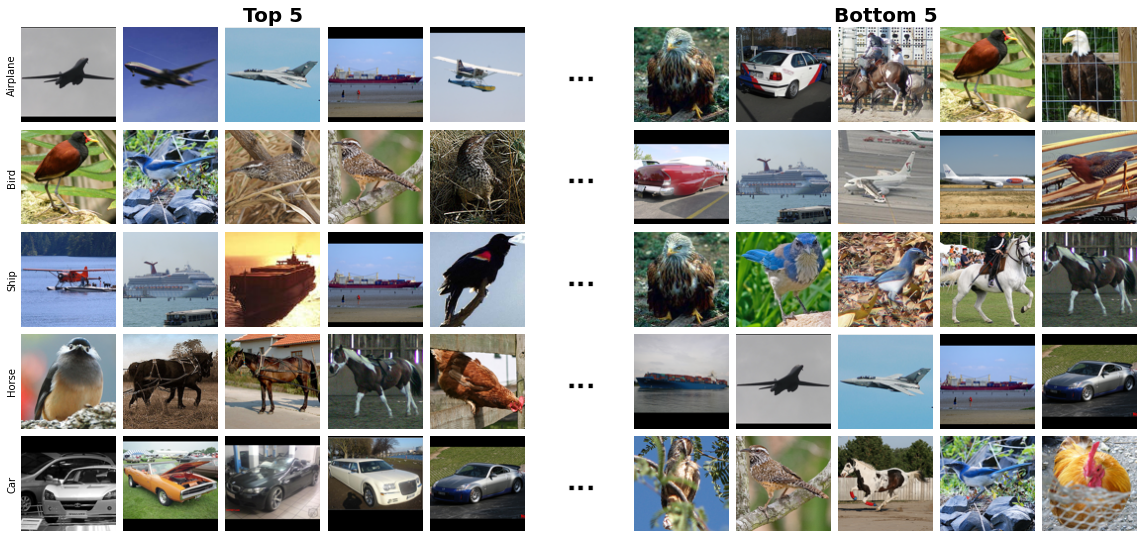

##################################### 40% ######################################

#################################### TRAIN #####################################


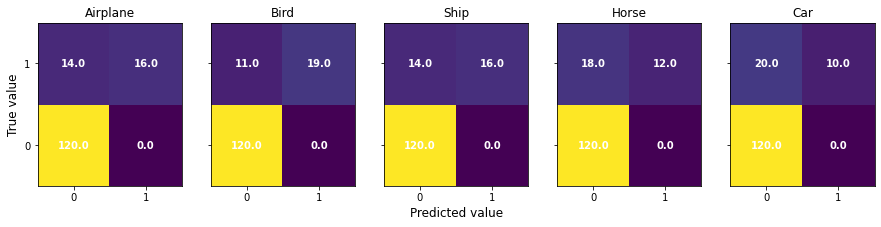

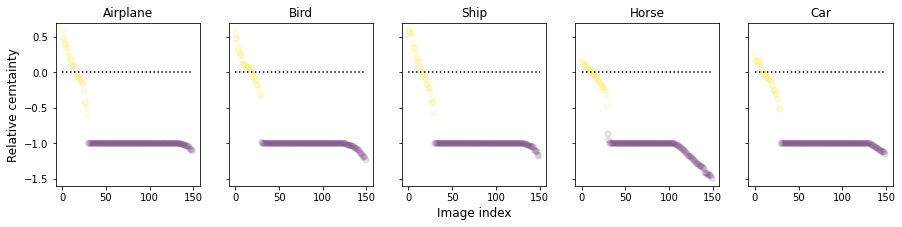

##################################### TEST #####################################


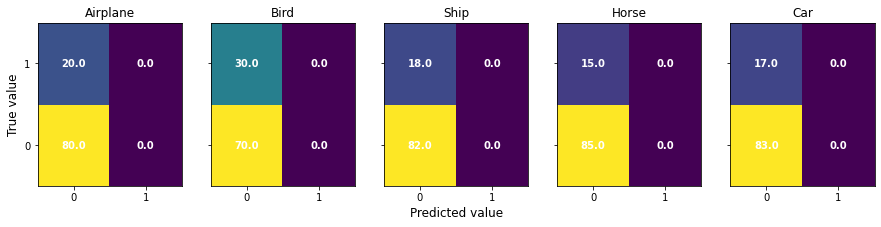

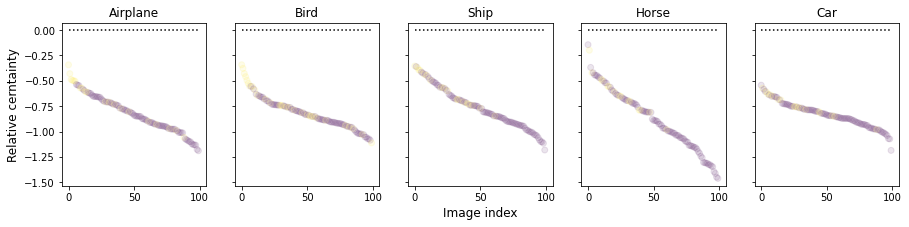

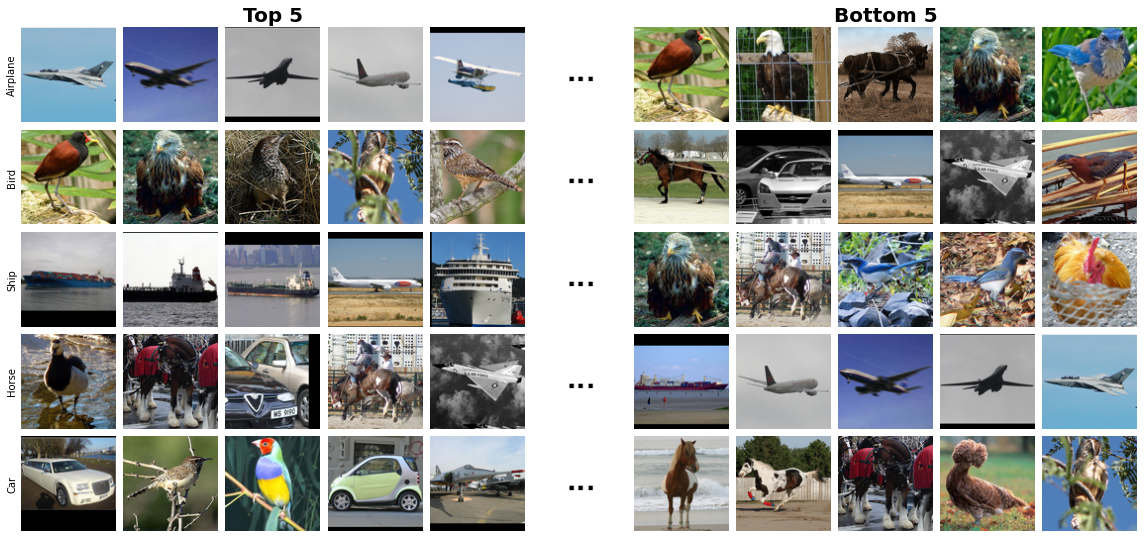

##################################### 50% ######################################

#################################### TRAIN #####################################


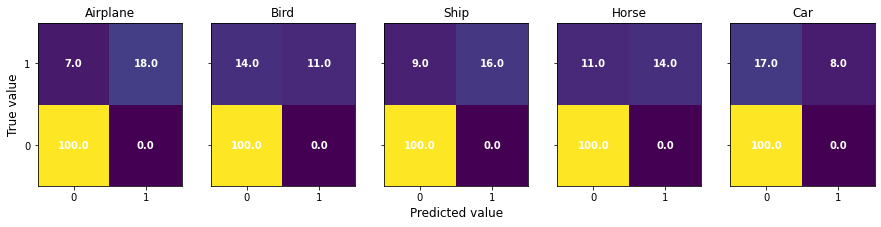

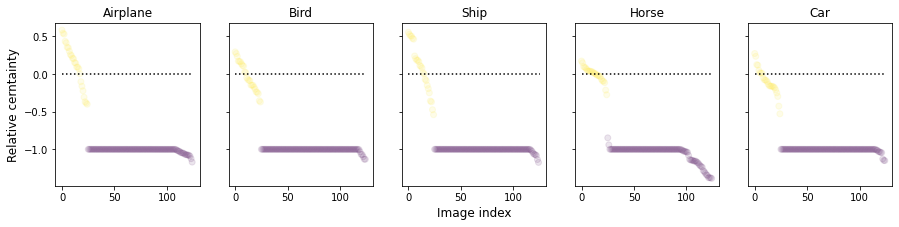

##################################### TEST #####################################


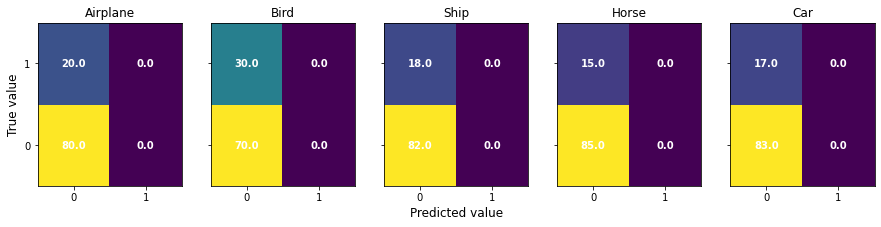

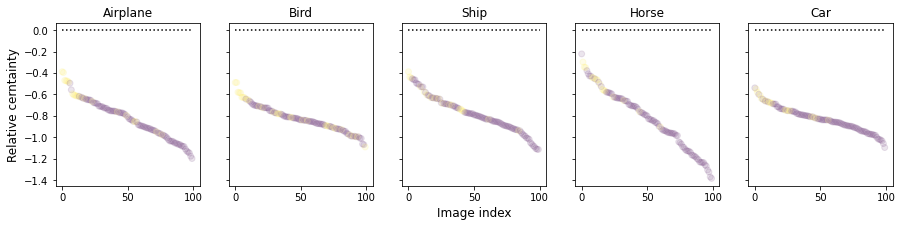

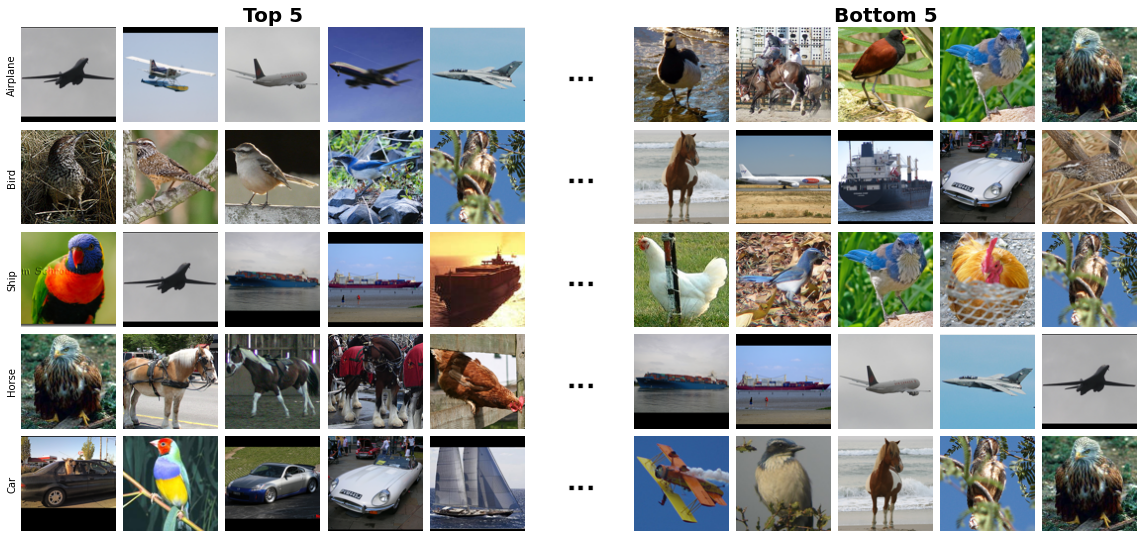

##################################### 60% ######################################

#################################### TRAIN #####################################


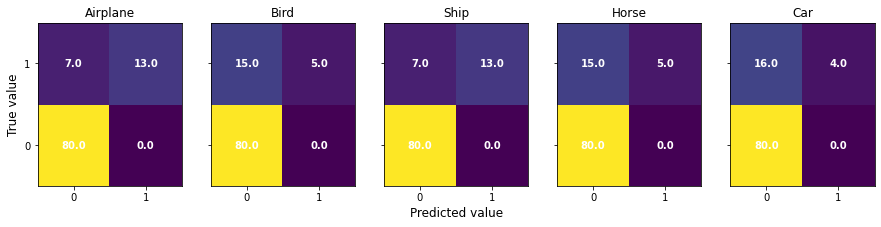

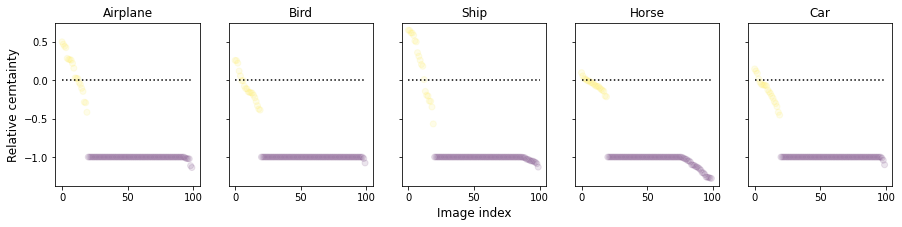

##################################### TEST #####################################


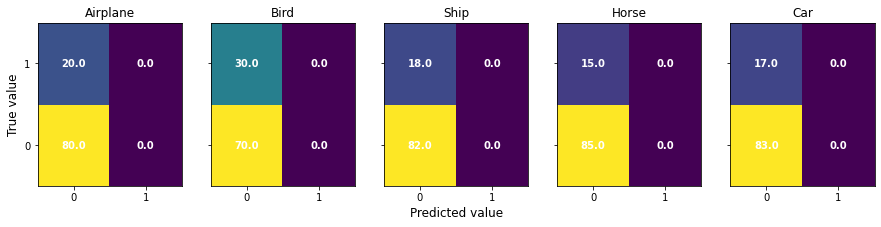

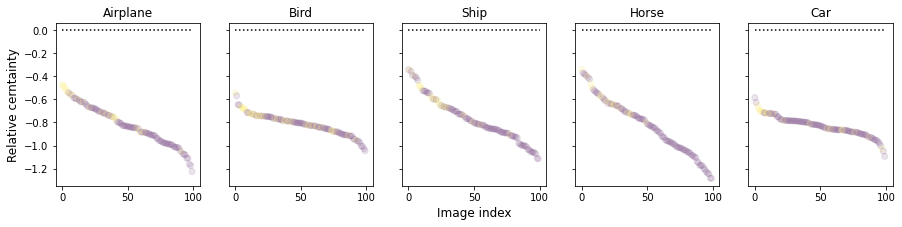

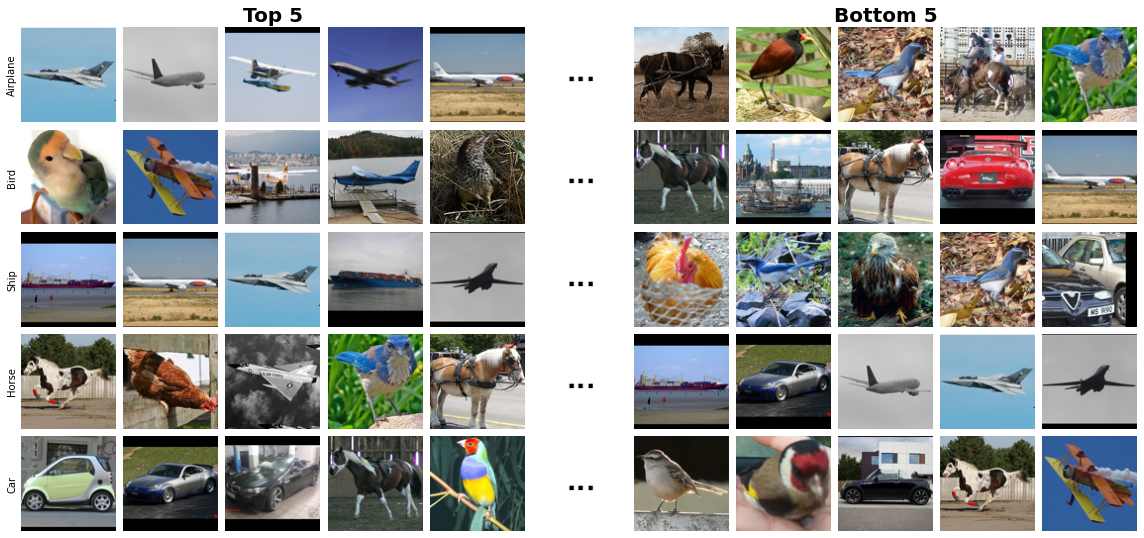

In [15]:


for percentage1 in percentages:
    print(f"{' ' + str(percentage1) + '% ':#^80}\n")
    preds_train_all, preds_test_all = load_predictions(percentage1, vocab_size)
    
    preds_train_ranked, preds_train_ranked_binary, preds_train_indices, labels_train_ranked, labels_train_ranked_binary = preds_train_all
    preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all

    
    # List of all the plots
    
    
    print(f"{' ' + 'TRAIN' + ' ':#^80}")
    train_plots = [plot_confusion_matrix(preds_train_ranked_binary, labels_train_ranked_binary),
                   plot_pred_distribution(preds_train_ranked, labels_train_ranked_binary)]
    [plt.show() for fig in train_plots]
    
    print(f"{' ' + 'TEST' + ' ':#^80}")
    test_plots  = [plot_confusion_matrix(preds_test_ranked_binary, labels_test_ranked_binary),
                   plot_pred_distribution(preds_test_ranked, labels_test_ranked_binary),
                   plot_top_images(images_test, preds_test_indices)]
    [plt.show() for fig in test_plots]
        

In [6]:
assert 1 == 2

AssertionError: 

In [ ]:
# LOAD = False

# for percentage1 in percentages:
#     print(f'######## {percentage1}% ##########')
#     percentage2 = 100 - percentage1
    
#     # Get dictionarys subset
#     _, _, images_train_subset2, labels_train_subset2 = select_subsets(images_train_ordered, labels_train_ordered, percentage1, percentage2)
#     images_train_subset2 = images_train_subset2.reshape(-1, *IMAGE_SHAPE)
#     labels_train_subset2 = labels_train_subset2.reshape(-1)

#     # Getting fitted classifiers
#     model = load(f'kmeans_model_{vocab_size}', percentage1, percentage2)
    
#     hist_test_filename = f'hists_test_{vocab_size}'
#     hist_train_filename = f'hists_train_{vocab_size}'
#     classifers_filename = f'classifiers_{vocab_size}'
#     preds_train_all_filename = f'preds_train_all_{vocab_size}'
#     preds_test_all_filename = f'preds_test_all_{vocab_size}'
    
# #     if not LOAD:
#     hists_train = np.array([calc_hist(img, model, bins) for img in tqdm(images_train_subset2, desc = 'Calculating train hists')])
#     hists_test = np.array([calc_hist(img, model, bins) for img in tqdm(images_test, desc = 'Calculating test hists')])
#     classifiers = get_classifiers(hists_train, labels_train_subset2)

#     save(hists_test, hist_test_filename, percentage1, percentage2)
#     save(hists_train, hist_train_filename, percentage1, percentage2)
#     save(classifiers, classifiers_filename, percentage1, percentage2)
    
# #     else:
# #         hists_test  = load(hist_test_filename, percentage1, percentage2)
# #         hists_train = load(hist_train_filename, percentage1, percentage2)
# #         classifiers = load(classifiers_filename, percentage1, percentage2)
    
    
#     # Predictions of labels
#     preds_train = np.array([classifier.decision_function(hists_train) for classifier in tqdm(classifiers, desc = 'Classifying train set')])
#     preds_test = np.array([classifier.decision_function(hists_test) for classifier in tqdm(classifiers, desc = 'Classifying test set')])

#     # Get ranked predictions
#     preds_train_all = rank(preds_train, labels_train_subset2)
#     preds_test_all = rank(preds_test, labels_test)
    
#     save(preds_train_all, 'preds_train_all', percentage1, percentage2)
#     save(preds_test_all, 'preds_test_all', percentage1, percentage2)

# mAP

In [ ]:
# for percentage1 in percentages:
#     print(f'######## {percentage1}% ##########')
#     percentage2 = 100 - percentage1
    
#     preds_train_all = load('preds_train_all', percentage1, percentage2)
#     preds_test_all  = load('preds_test_all', percentage1, percentage2)
    
#     preds_train_ranked, preds_train_ranked_binary, preds_train_indices, labels_train_ranked, labels_train_ranked_binary = preds_train_all
#     preds_test_ranked, preds_test_ranked_binary, preds_test_indices, labels_test_ranked, labels_test_ranked_binary = preds_test_all

#     mAP_train = calculate_mAP(predictions_train_ranked_binary, predictions_train_ranked, labels_train_ranked_binary)
#     mAP_test  = calculate_mAP(predictions_test_ranked_binary, predictions_test_ranked, labels_test_ranked_binary)
#     print(f'mAP_train {mAP_train:.2f}\tmAP_test {mAP_test:.2f}')
    
    
#     # Plot confusion matrix and prediciton distribution
#     train_plots = [plot_confusion_matrix(preds_train_ranked_binary, labels_train_ranked_binary),
#                    plot_prediction_distribution(preds_train_ranked, labels_train_ranked_binary)]
#     test_plots  = [plot_confusion_matrix(preds_test_ranked_binary, labels_test_ranked_binary),
#                    plot_prediction_distribution(preds_test_ranked, labels_test_ranked_binary)]
    
#     for fig in train_plots:
#         plt.show()
        
#     for fig in test_plots:
#         plt.show()
        
        


# Final Plotting

In [ ]:
plot_top_images(images_train_subset2, preds_train_indices)
plot_top_images(images_test, preds_test_indices)

In [ ]:
example_predictions = np.array([1,1,0,1,0,0,1,0])
example_labels = np.array([1,1,1,1,1,1,1,1])
example_solution = 1/4*(1/1 + 2/2 + 0/3 + 3/4 + 0/5 + 0/6 + 4/7 + 0/8)
assert( 1/4 * fc(example_predictions, example_labels) == example_solution )
example_solution

## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision over all classes. The Average Precision for a single class c is defines as
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}\mbox{ ,}
\end{equation}
where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$ ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. For the qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40%, 50% and 60%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000, 1500, 2000). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor. 
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

In [ ]:
################################
# Todo: finish the code
################################